# Learning from Noisy Labels with Deep Neural Networks

This notebook contains the script to run the models used in _Learning from Noisy Labels with Deep Neural
Networks: combining sample selection and a robust loss function_.


## Import repository

The functions we use are defined in our repository on github.

In [ ]:
!git clone https://github.com/adam-dvd/DNN_noisy_labels.git

Cloning into 'DNN_noisy_labels'...
remote: Enumerating objects: 221, done.
remote: Counting objects: 100% (221/221), done.
remote: Compressing objects: 100% (146/146), done.
remote: Total 221 (delta 115), reused 178 (delta 72), pack-reused 0
Receiving objects: 100% (221/221), 40.56 KiB | 6.76 MiB/s, done.
Resolving deltas: 100% (115/115), done.


In [ ]:
%cd DNN_noisy_labels/

/content/DNN_noisy_labels


In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms
import numpy as np

import matplotlib.pyplot as plt

import main

# 20% noise rate

We lead experiments on a data set composed from four classes of CIFAR10: cats, dogs, horses and dears. First we see how the models react to 20% of noisified labels.

In [ ]:
 # set noise rate to 0.2
args=main.Arguments(
		noise_rate=0.2,
)

In [ ]:
# import data with a noisy train set and a clean test set

train_dataset = main.CIFAR4(root=args.result_dir,
              download=True,
              train=True,
              transform=transforms.ToTensor(),
      noise_rate=args.noise_rate
        )

test_dataset = main.CIFAR4(root=args.result_dir,
              download=True,
              train=False,
              transform=transforms.ToTensor(),
        noise_rate=args.noise_rate
        )

Actual noise 0.20
[[0.8        0.06666667 0.06666667 0.06666667]
 [0.06666667 0.8        0.06666667 0.06666667]
 [0.06666667 0.06666667 0.8        0.06666667]
 [0.06666667 0.06666667 0.06666667 0.8       ]]
Files already downloaded and verified


In [ ]:
# boolean array to track which data is noisified
noise_or_not = train_dataset.noise_or_not 

## Base model

This will be our reference to compare performences. The model comes from Han et al. (2018) and is a 9 layers convolutionnal neural network with cross entropy loss.

In [ ]:
input_channel=3
num_classes=4

In [ ]:
basenet= main.CNN(input_channel=input_channel, n_outputs=num_classes).cuda()
test_loader = torch.utils.data.DataLoader(
	dataset=test_dataset,batch_size=128,
	num_workers=2,shuffle=False, pin_memory=True)

In [ ]:
# base model
args.n_epoch=100

_, accuracies_base_20 = main.first_stage(
		network=basenet,
		test_loader=test_loader, 
		train_dataset=train_dataset, 
		args=args, 
		noise_or_not=noise_or_not
)

# last results: acc=69.9
# last results: acc=69.6

/usr/local/lib/python3.10/dist-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='none' instead.
  warnings.warn(warning.format(ret))


epoch:1 lr:0.010000 train_loss: 1.2437319004058838 test_accuracy:25.000000
epoch:2 lr:0.010000 train_loss: 1.1556774765014648 test_accuracy:56.425000
epoch:3 lr:0.010000 train_loss: 1.0987435997009278 test_accuracy:61.625000
epoch:4 lr:0.010000 train_loss: 1.0613774233818054 test_accuracy:66.225000
epoch:5 lr:0.010000 train_loss: 1.021909029006958 test_accuracy:68.450000
epoch:6 lr:0.010000 train_loss: 0.9906086322784424 test_accuracy:70.600000
epoch:7 lr:0.010000 train_loss: 0.9585459406852722 test_accuracy:70.075000
epoch:8 lr:0.010000 train_loss: 0.931341321182251 test_accuracy:72.150000
epoch:9 lr:0.010000 train_loss: 0.8954269807815551 test_accuracy:72.500000
epoch:10 lr:0.010000 train_loss: 0.8602228570938111 test_accuracy:71.650000
epoch:11 lr:0.010000 train_loss: 0.8201522891998291 test_accuracy:71.975000
epoch:12 lr:0.010000 train_loss: 0.7809691521644593 test_accuracy:72.425000
epoch:13 lr:0.010000 train_loss: 0.741952255821228 test_accuracy:71.625000
epoch:14 lr:0.010000 tra

## Active-passive Loss: Normalized Loss Functions for Deep Learning with Noisy Labels
We follow Ma et al. (2020) and use the RCEandNCE combination on the CIFAR4 dataset (CIFAR10 reduced to 4 classes).

In [ ]:
# Active passive loss
args.n_epoch=100

basenet= main.CNN(input_channel=input_channel, n_outputs=num_classes).cuda()
test_loader = torch.utils.data.DataLoader(
	dataset=test_dataset,batch_size=128,
	num_workers=2,shuffle=False, pin_memory=True)

_, accuracies_APloss_20 = main.first_stage(
		network=basenet,
		test_loader=test_loader, 
		train_dataset=train_dataset, 
		args=args, 
		noise_or_not=noise_or_not,
    active_passive_loss=True
)

# last results: acc=77.8
# last results: acc=75.7

epoch:1 lr:0.010000 train_loss: 0.044961124658584595 test_accuracy:25.000000
epoch:2 lr:0.010000 train_loss: 0.04186634304523468 test_accuracy:47.375000
epoch:3 lr:0.010000 train_loss: 0.04058745552301407 test_accuracy:52.650000
epoch:4 lr:0.010000 train_loss: 0.03977778058052063 test_accuracy:50.350000
epoch:5 lr:0.010000 train_loss: 0.03867164272069931 test_accuracy:53.025000
epoch:6 lr:0.010000 train_loss: 0.038292984318733216 test_accuracy:52.800000
epoch:7 lr:0.010000 train_loss: 0.03752737808227539 test_accuracy:54.475000
epoch:8 lr:0.010000 train_loss: 0.036817372131347656 test_accuracy:55.725000
epoch:9 lr:0.010000 train_loss: 0.0360511102437973 test_accuracy:57.475000
epoch:10 lr:0.010000 train_loss: 0.03586203954219818 test_accuracy:61.275000
epoch:11 lr:0.010000 train_loss: 0.03494802654981613 test_accuracy:55.650000
epoch:12 lr:0.010000 train_loss: 0.03455084193944931 test_accuracy:59.675000
epoch:13 lr:0.010000 train_loss: 0.034021247613430027 test_accuracy:58.050000
epoch

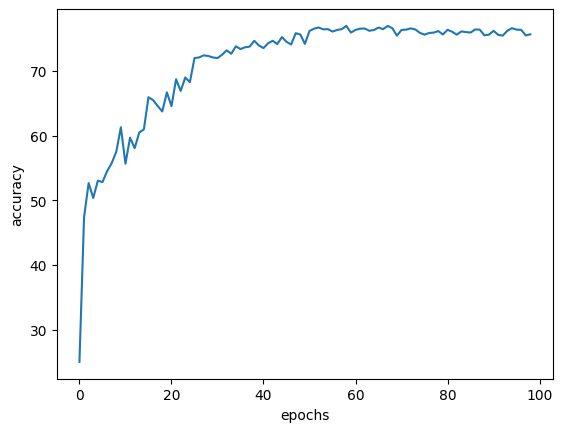

In [ ]:
# APL plot: Accuracy vs number of epochs
plt.plot(accuracies_APloss_20)

plt.xlabel('epochs')
plt.ylabel('accuracy')

plt.show()

Accuracy is up by 6 points compared to the base model.

## O2U-Net: A Simple Noisy Label Detection Approach for Deep Neural Networks

In their article, Huang et al. (2019) propose an approach to clean a dataset from its noisy labels. In this section, we will use their code to illustrate how that works on CIFAR4, our four-classes version of CIFAR10.

A first experiment with 30 epochs for each stages gave us the following plot. It shows the remaining noise in the cleaned step during the second stage: after around 20 epochs, it stabilizes. For a fair comparison, we can only use 100 epochs in total to optimize the model. Thus, we distribute the epochs as follows: first stage: 30 epochs, second stage: 20 epochs, third stage: 50 epochs. 

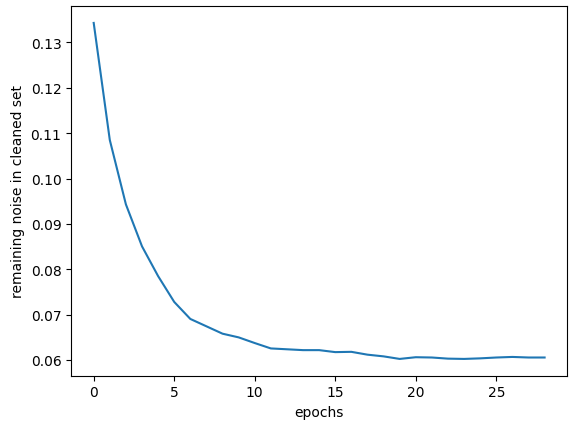

In [ ]:
# O2U-Net: 3 steps

args.n_epoch=30

basenet= main.CNN(input_channel=input_channel, n_outputs=num_classes).cuda()
test_loader = torch.utils.data.DataLoader(
	dataset=test_dataset,batch_size=128,
	num_workers=2,shuffle=False, pin_memory=True)

_, accuracies_o2u1_20 = main.first_stage(
		network=basenet,
		test_loader=test_loader, 
		train_dataset=train_dataset, 
		args=args, 
		noise_or_not=noise_or_not
)

args.n_epoch=20

filter_mask, lr_l, mask_l, accuracies_o2u2_20, loss_1_sorted_l = main.second_stage(
		network=basenet,
		test_loader=test_loader, 
		train_dataset=train_dataset, 
		args=args, 
		noise_or_not=noise_or_not, 
)

args.n_epoch=50

loss_o2u3, accuracies_o2u3_20 = main.first_stage(
		network=basenet,
		test_loader=test_loader,
		train_dataset=train_dataset, 
		args=args, 
		noise_or_not=noise_or_not, 
		filter_mask=filter_mask
)

# last results for 20% noise: noise acc 76.1, final acc: 79.6

epoch:1 lr:0.010000 train_loss: 1.2425453773498536 test_accuracy:25.000000
epoch:2 lr:0.010000 train_loss: 1.1528236148834228 test_accuracy:57.075000
epoch:3 lr:0.010000 train_loss: 1.099013395500183 test_accuracy:61.625000
epoch:4 lr:0.010000 train_loss: 1.0568199104309082 test_accuracy:66.175000
epoch:5 lr:0.010000 train_loss: 1.0197665571212768 test_accuracy:67.625000
epoch:6 lr:0.010000 train_loss: 0.9839516738891602 test_accuracy:69.025000
epoch:7 lr:0.010000 train_loss: 0.9528307567596436 test_accuracy:69.825000
epoch:8 lr:0.005000 train_loss: 0.8702625513076783 test_accuracy:71.900000
epoch:9 lr:0.005000 train_loss: 0.8357735656738281 test_accuracy:74.575000
epoch:10 lr:0.005000 train_loss: 0.8021226622581482 test_accuracy:72.800000
epoch:11 lr:0.005000 train_loss: 0.7606728609085083 test_accuracy:73.225000
epoch:12 lr:0.005000 train_loss: 0.7226429955482483 test_accuracy:71.900000
epoch:13 lr:0.005000 train_loss: 0.6768573678970337 test_accuracy:70.400000
epoch:14 lr:0.005000 t

The accuracy of the model obtained by this method is greater by 10 points compared to the base model, and by 4 points compared to the model from Ma et al. (2020). 

Below we illustrate how the noisy labels are detected:

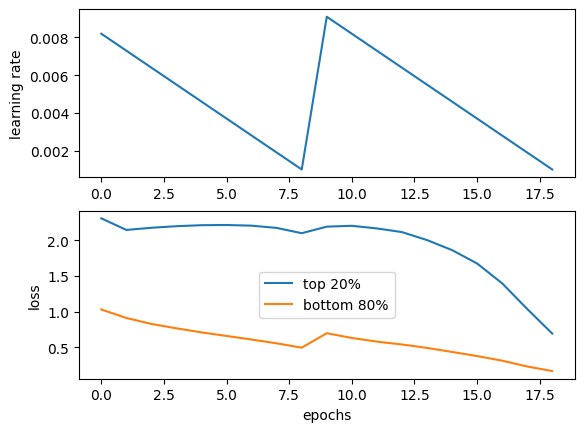

In [ ]:
# O2U-Net plots: 
# (top) cyclical learning rate 
# (bottom) loss for the 20% samples with the highest loss and for the rest

top_noise = []
clean = []

for loss_1_sorted in loss_1_sorted_l:
  top_noise.append(np.mean(np.array(loss_1_sorted[16000:])))
  clean.append(np.mean(np.array(loss_1_sorted[:16000])))

fig, axs = plt.subplots(2,1)

axs[0].plot(lr_l)
axs[0].set_ylabel('learning rate')

axs[1].plot(top_noise, label='top 20%')
axs[1].plot(clean, label='bottom 80%')
axs[1].set_ylabel("loss")

plt.legend()
plt.xlabel("epochs")

plt.show()

The noisy labeled data loss is more sensible to changes of learing rate because they are more difficult to learn. By cyclically changing the learing rate, the noisy labels are detected as the top 20% of the data sorted by loss.

Below we plot how the remaining noise percentage in the cleaned evolves.

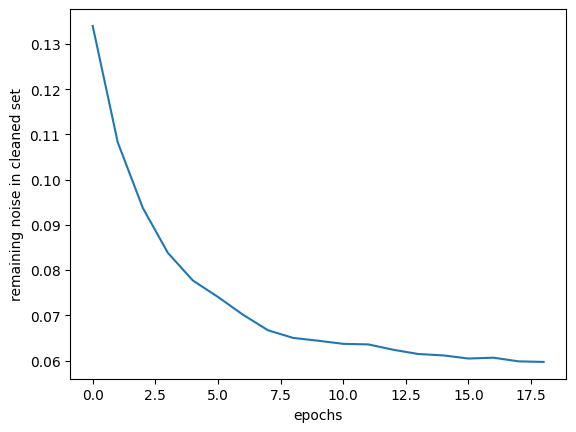

In [ ]:
# O2U-Net plot: remaining noise during second stage 

remaining_noise_l = []

for mask in mask_l:
  remaining_noise_or_not = noise_or_not & np.logical_not(mask)
  remaining = np.sum(remaining_noise_or_not)/16000
  remaining_noise_l.append(remaining)

plt.plot(remaining_noise_l)

plt.xlabel('epochs')
plt.ylabel('remaining noise in cleaned set')

plt.savefig('remainingnoise.png')

plt.show()

# Combining both methods

Here we try combining the two methods: first we clean the data using the method by Huang et al. (2019) and then we use the passive and active loss to fit the model on the cleaned dataset. Note that for detecting the noisy labels we still use the cross entropy loss as in Huang et al. (2019). 

As the filter_mask (masking the detected noisy data) has already been computed, we just need to use the third stage, fitting our model on the cleaned data set with the active passive loss from Ma et al (2020).

In [ ]:
args.n_epoch = 50

_, accuracies_combined_20 = main.first_stage(
		network=basenet,
		test_loader=test_loader,
		train_dataset=train_dataset, 
		args=args, 
		noise_or_not=noise_or_not,
    active_passive_loss=True, 
		filter_mask=filter_mask
)

# last results: acc=81.15

origin set number:20000 after clean number:16000
restore model from my_cnn_cifar10_0.2.pt.pt
epoch:1 lr:0.010000 train_loss: 0.021659461371600627 test_accuracy:67.575000
epoch:2 lr:0.010000 train_loss: 0.019122729456424712 test_accuracy:57.750000
epoch:3 lr:0.010000 train_loss: 0.01585787858963013 test_accuracy:65.150000
epoch:4 lr:0.010000 train_loss: 0.01433345987200737 test_accuracy:70.450000
epoch:5 lr:0.010000 train_loss: 0.01345171000957489 test_accuracy:66.700000
epoch:6 lr:0.010000 train_loss: 0.012655284288525581 test_accuracy:72.900000
epoch:7 lr:0.010000 train_loss: 0.011676069128513336 test_accuracy:74.025000
epoch:8 lr:0.010000 train_loss: 0.011257185524702073 test_accuracy:74.050000
epoch:9 lr:0.010000 train_loss: 0.010895903891324997 test_accuracy:75.775000
epoch:10 lr:0.010000 train_loss: 0.010462392038106918 test_accuracy:76.550000
epoch:11 lr:0.010000 train_loss: 0.009619349446892739 test_accuracy:74.650000
epoch:12 lr:0.010000 train_loss: 0.009194224539399148 test_ac

The accuracy of the combined model on 50 epochs is greater than the o2u net model on 50 epochs by 1.55 points - and this consistantly over the 20 epochs where the accuracy is stable -, which is rather satisfying though this gain might not be as good on more epochs.

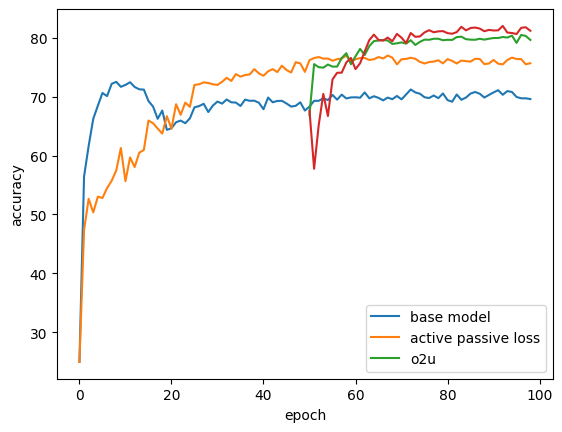

In [ ]:
# Plot: Accuracies vs epochs for noise_rate=0.2, all methods

plt.plot(accuracies_base_20, label='base model')
plt.plot(accuracies_APloss_20, label='active passive loss')
x_max = len(accuracies_base_20)
plt.plot(range(x_max - len(accuracies_o2u3_20),x_max), accuracies_o2u3_20, label='o2u')
plt.plot(range(x_max - len(accuracies_combined_20),x_max), accuracies_combined_20)

plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()

plt.show()

In red we have the combined model: training from the dataset cleaned by o2u with the active passive loss. 

Interestingly we observe that the base model decreases in accuracy after 10 epochs and the stabilises. This can be explained as follows: first it learns the easy data - the clean data - and thus it is accurate on the test data - which is clean. Then it learns the most difficult data: the noisy data, and decreases in accuracy on the clean test data. The active passive loss is robust to this phenomenon as we can observe. 

# 60% noise rate

In [ ]:
# set noise rate to 0.6
args=main.Arguments(
		noise_rate=0.6,
)

In [ ]:
train_dataset = main.CIFAR4(root=args.result_dir,
              download=True,
              train=True,
              transform=transforms.ToTensor(),
      noise_rate=args.noise_rate
        )

test_dataset = main.CIFAR4(root=args.result_dir,
              download=True,
              train=False,
              transform=transforms.ToTensor(),
        noise_rate=args.noise_rate
        )

Actual noise 0.60
[[0.4 0.2 0.2 0.2]
 [0.2 0.4 0.2 0.2]
 [0.2 0.2 0.4 0.2]
 [0.2 0.2 0.2 0.4]]
Files already downloaded and verified


In [ ]:
 # boolean array to track which data is noisified
noise_or_not = train_dataset.noise_or_not

## Base model

In [ ]:
input_channel=3
num_classes=4

In [ ]:
basenet= main.CNN(input_channel=input_channel, n_outputs=num_classes).cuda()
test_loader = torch.utils.data.DataLoader(
	dataset=test_dataset,batch_size=128,
	num_workers=2,shuffle=False, pin_memory=True)

In [ ]:
# base model
args.n_epoch=100

_, accuracies_base_60 = main.first_stage(
		network=basenet,
		test_loader=test_loader, 
		train_dataset=train_dataset, 
		args=args, 
		noise_or_not=noise_or_not
)

# last results: acc=36.2

epoch:1 lr:0.010000 train_loss: 1.3998986114501952 test_accuracy:25.000000
epoch:2 lr:0.010000 train_loss: 1.3841998815536498 test_accuracy:40.100000
epoch:3 lr:0.010000 train_loss: 1.3815591960906983 test_accuracy:46.175000
epoch:4 lr:0.010000 train_loss: 1.3801118564605712 test_accuracy:40.075000
epoch:5 lr:0.010000 train_loss: 1.3733639167785645 test_accuracy:49.850000
epoch:6 lr:0.010000 train_loss: 1.3696488735198975 test_accuracy:48.375000
epoch:7 lr:0.010000 train_loss: 1.365889433670044 test_accuracy:47.675000
epoch:8 lr:0.010000 train_loss: 1.3623791641235352 test_accuracy:45.275000
epoch:9 lr:0.010000 train_loss: 1.3552458280563355 test_accuracy:47.800000
epoch:10 lr:0.010000 train_loss: 1.351421258544922 test_accuracy:48.900000
epoch:11 lr:0.010000 train_loss: 1.3421631759643555 test_accuracy:48.175000
epoch:12 lr:0.010000 train_loss: 1.3324713985443115 test_accuracy:46.700000
epoch:13 lr:0.010000 train_loss: 1.322843238067627 test_accuracy:45.825000
epoch:14 lr:0.010000 tra

## Active-passive Loss: Normalized Loss Functions for Deep Learning with Noisy Labels
We follow Ma et al. (2020) and use the RCEandNCE combination on the CIFAR4 dataset (CIFAR10 reduced to 4 classes).

In [ ]:
# Active passive loss
args.n_epoch=100

basenet= main.CNN(input_channel=input_channel, n_outputs=num_classes).cuda()
test_loader = torch.utils.data.DataLoader(
	dataset=test_dataset,batch_size=128,
	num_workers=2,shuffle=False, pin_memory=True)

_, accuracies_APloss_60 = main.first_stage(
		network=basenet,
		test_loader=test_loader, 
		train_dataset=train_dataset, 
		args=args, 
		noise_or_not=noise_or_not,
    active_passive_loss=True
)

# last results: acc=49.6

epoch:1 lr:0.010000 train_loss: 0.05491654727458954 test_accuracy:25.000000
epoch:2 lr:0.010000 train_loss: 0.05448189437389374 test_accuracy:39.125000
epoch:3 lr:0.010000 train_loss: 0.05410678791999817 test_accuracy:42.775000
epoch:4 lr:0.010000 train_loss: 0.053914664673805235 test_accuracy:36.400000
epoch:5 lr:0.010000 train_loss: 0.05309896101951599 test_accuracy:43.300000
epoch:6 lr:0.010000 train_loss: 0.053121140408515934 test_accuracy:44.225000
epoch:7 lr:0.010000 train_loss: 0.0528937970161438 test_accuracy:44.950000
epoch:8 lr:0.010000 train_loss: 0.052840399932861326 test_accuracy:43.850000
epoch:9 lr:0.010000 train_loss: 0.05284873893260956 test_accuracy:43.650000
epoch:10 lr:0.010000 train_loss: 0.05244023020267487 test_accuracy:45.050000
epoch:11 lr:0.010000 train_loss: 0.05276710512638092 test_accuracy:46.325000
epoch:12 lr:0.010000 train_loss: 0.05251650002002716 test_accuracy:46.850000
epoch:13 lr:0.010000 train_loss: 0.052188309288024905 test_accuracy:46.925000
epoch

The accuracy of the model with the active passive loss has remarkable gain of 13.4 points.

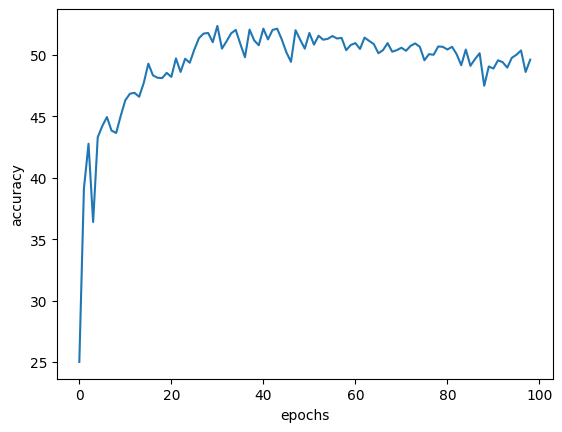

In [ ]:
# APL plot: Accuracy vs number of epochs
plt.plot(accuracies_APloss_60)

plt.xlabel('epochs')
plt.ylabel('accuracy')

plt.show()

As previously, we can see that above 40 epochs, the accuracy decreases a bit: this can be explained by the noisy labels being fitted and thus confusing the model. This effect is much more notable on the base model because its loss doesn't account for this effect. See the global plot at the end of the section.

## O2U-Net: A Simple Noisy Label Detection Approach for Deep Neural Networks

In their article, Huang et al. (2019) propose an approach to clean a dataset from its noisy labels. In this section, we will use their code to illustrate how that works on CIFAR4, our four-classes version of CIFAR10.

In [ ]:
# O2U-Net: 3 steps

args.n_epoch=30

basenet= main.CNN(input_channel=input_channel, n_outputs=num_classes).cuda()
test_loader = torch.utils.data.DataLoader(
	dataset=test_dataset,batch_size=128,
	num_workers=2,shuffle=False, pin_memory=True)

_, accuracies_o2u1_60 = main.first_stage(
		network=basenet,
		test_loader=test_loader, 
		train_dataset=train_dataset, 
		args=args, 
		noise_or_not=noise_or_not
)

args.n_epoch=20

filter_mask, lr_l, mask_l, accuracies_o2u2_60, loss_1_sorted_l = main.second_stage(
		network=basenet,
		test_loader=test_loader, 
		train_dataset=train_dataset, 
		args=args, 
		noise_or_not=noise_or_not, 
)

args.n_epoch=50

loss_o2u3, accuracies_o2u3_60 = main.first_stage(
		network=basenet,
		test_loader=test_loader,
		train_dataset=train_dataset, 
		args=args, 
		noise_or_not=noise_or_not, 
		filter_mask=filter_mask
)

# last results for 60% noise: noise acc 77.6, final acc: 56.7

epoch:1 lr:0.010000 train_loss: 1.399563638305664 test_accuracy:25.000000
epoch:2 lr:0.010000 train_loss: 1.3849621719360352 test_accuracy:43.475000
epoch:3 lr:0.010000 train_loss: 1.382290834236145 test_accuracy:46.200000
epoch:4 lr:0.010000 train_loss: 1.3797917263031005 test_accuracy:44.075000
epoch:5 lr:0.010000 train_loss: 1.3770641813278197 test_accuracy:50.175000
epoch:6 lr:0.010000 train_loss: 1.372495523071289 test_accuracy:50.175000
epoch:7 lr:0.010000 train_loss: 1.3705454822540284 test_accuracy:44.050000
epoch:8 lr:0.005000 train_loss: 1.3574985229492187 test_accuracy:47.575000
epoch:9 lr:0.005000 train_loss: 1.350063803100586 test_accuracy:50.750000
epoch:10 lr:0.005000 train_loss: 1.3453266799926757 test_accuracy:48.725000
epoch:11 lr:0.005000 train_loss: 1.3408468395233155 test_accuracy:50.000000
epoch:12 lr:0.005000 train_loss: 1.3335364736557007 test_accuracy:48.400000
epoch:13 lr:0.005000 train_loss: 1.322479843902588 test_accuracy:45.925000
epoch:14 lr:0.005000 train

With this method we gain 7.0 points in accuracy compared to the method from Ma and al. (2020), and 20.4 points compared to the base model.

# Combining both methods

Here we try combining the two methods: first we clean the data using the method by Huang et al. (2019) and then we use the passive and active loss to fit the model on the cleaned dataset. Note that for detecting the noisy labels we still use the cross entropy loss as in Huang et al. (2019).

In [ ]:
args.n_epoch = 50

_, accuracies_combined_60 = main.first_stage(
		network=basenet,
		test_loader=test_loader,
		train_dataset=train_dataset, 
		args=args, 
		noise_or_not=noise_or_not,
    active_passive_loss=True, 
		filter_mask=filter_mask
)

# last results: acc=55.7

origin set number:20000 after clean number:8000
restore model from my_cnn_cifar10_0.6.pt.pt
epoch:1 lr:0.010000 train_loss: 0.011486693811416626 test_accuracy:37.750000
epoch:2 lr:0.010000 train_loss: 0.010472908902168274 test_accuracy:45.300000
epoch:3 lr:0.010000 train_loss: 0.009717643201351166 test_accuracy:51.100000
epoch:4 lr:0.010000 train_loss: 0.009269385361671448 test_accuracy:49.100000
epoch:5 lr:0.010000 train_loss: 0.008850437104701996 test_accuracy:52.275000
epoch:6 lr:0.010000 train_loss: 0.008631681215763092 test_accuracy:51.500000
epoch:7 lr:0.010000 train_loss: 0.008213089466094971 test_accuracy:52.550000
epoch:8 lr:0.010000 train_loss: 0.007972358334064483 test_accuracy:53.700000
epoch:9 lr:0.010000 train_loss: 0.0077330124676227565 test_accuracy:53.975000
epoch:10 lr:0.010000 train_loss: 0.007773479974269867 test_accuracy:51.200000
epoch:11 lr:0.010000 train_loss: 0.0072240421235561375 test_accuracy:54.200000
epoch:12 lr:0.010000 train_loss: 0.007243923169374466 tes

In the 60% noise setting we observe a drop by 1 point in accuracy when combining methods rather then using just Huang et al. (2019). However it is not consistant over the last epochs and it seems that the two models obtain similar results. The lack of data and the noise accuaracy of only 77.6% when cleaning might explain this low accuracy (broadly 2000 images by class after cleaning) of 55.7% for both models.

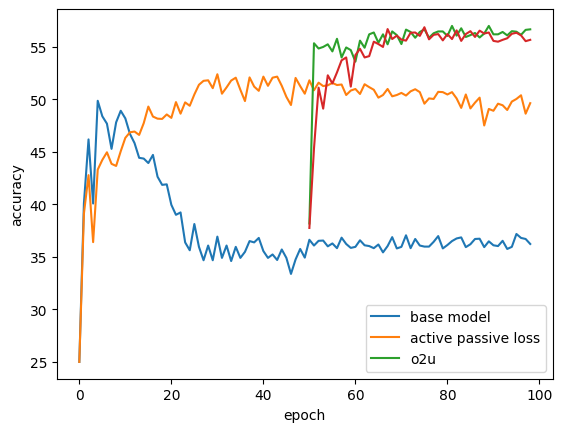

In [ ]:
# Plot: Accuracies vs epochs for noise_rate=0.6, all methods

plt.plot(accuracies_base_60, label='base model')
plt.plot(accuracies_APloss_60, label='active passive loss')
x_max = len(accuracies_base_60)
plt.plot(range(x_max - len(accuracies_o2u3_60),x_max), accuracies_o2u3_60, label='o2u')
plt.plot(range(x_max - len(accuracies_combined_60),x_max), accuracies_combined_60)

plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()
plt.show()

The red line plots the accuracy of the combined model.

In this 60% noise setting we observe again that the noisy data confuses the base model after roughly 10 epochs, and that the active passive loss model is robust to this phenomenon.